<a href="https://colab.research.google.com/github/PedroAMtz/Multi-Class-Prediction-of-Obesity-Risk/blob/main/Multi_Class_Prediction_of_Obesity_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Class Prediction of Obesity Risk 📈📉

**Your Goal:** The goal of this competition is to use various factors to predict obesity risk in individuals, which is related to cardiovascular disease.

**Link to Kaggle competition:** https://www.kaggle.com/competitions/playground-series-s4e2

We are going to use this Kaggle competition in order to build up and explain some relevant concepts related with Data Science and the different steps we are going to take in order to reach the optimal solution. So there will be some advance implementations that I will cover and further explain and justify like in the case of the models we select for training.

The following is how the notebook is structured:

* Problem understanding 🧐
* Data Understanding 💾
* Data Analysis 🔬
* Feature engineering & Data Preparation 🛠
* Modeling 🤖
* Performance evaluation & Inference 📊
* Saving model/s 🔐
* Insights 📋

## Problem Understanding 🧐

From medical perspective the value of this research and experimentation is to provide such models capable of recommending and supporting professionals diagnosis for obesity risk based on several features of patients.

## Data Understanding 💾

The data consist of the estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition , data was collected using a web platform with a survey where anonymous users answered each question, then the information was processed obtaining 17 attributes and 2111 records.

The attributes related with eating habits are: Frequent consumption of high caloric food (FAVC), Frequency of consumption of vegetables (FCVC), Number of main meals (NCP), Consumption of food between meals (CAEC), Consumption of water daily (CH20), and Consumption of alcohol (CALC). The attributes related with the physical condition are: Calories consumption monitoring (SCC), Physical activity frequency (FAF), Time using technology devices (TUE), Transportation used (MTRANS)

## Data Analysis 🔬

In this step we now begin with programming, the objective of this section will be to interpret and find relevant relationships between data features in order to better interpret the models. Doing it mainly by plotting different graphs using matplotlib and seaborn.

**Load libraries and show data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data_path = "/content/drive/MyDrive/Data_Science_Foundations/playground-series-s4e2/"

train_data = pd.read_csv(data_path + "train.csv")
train_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


**Show relevant information about data**

Here we use the `.info()` method in order to search for null and also for knowing the dtype of the different columns present in our dataframe.

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

We use `.describe(include="all")` in order to show some descriptive stats from data and also to get the unique values for categorical columns.

In [5]:
train_data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,20758.0,NaN,NaN,NaN,10378.5,5992.46278,0.0,5189.25,10378.5,15567.75,20757.0
Gender,20758,2,Female,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,20758.0,NaN,NaN,NaN,23.841804,5.688072,14.0,20.0,22.815416,26.0,61.0
Height,20758.0,NaN,NaN,NaN,1.700245,0.087312,1.45,1.631856,1.7,1.762887,1.975663
Weight,20758.0,NaN,NaN,NaN,87.887768,26.379443,39.0,66.0,84.064875,111.600553,165.057269
family_history_with_overweight,20758,2,yes,17014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FAVC,20758,2,yes,18982,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FCVC,20758.0,NaN,NaN,NaN,2.445908,0.533218,1.0,2.0,2.393837,3.0,3.0
NCP,20758.0,NaN,NaN,NaN,2.761332,0.705375,1.0,3.0,3.0,3.0,4.0
CAEC,20758,4,Sometimes,17529,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
train_data[["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]].describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


**Bar plots**

Normally we use bar plot for gaining some relevant information about a categorical variables, this case we want to show a plot that could tell us about the balance of classes in data like in the next plots showing the total count of data belonging to each class and then divided for different gender.

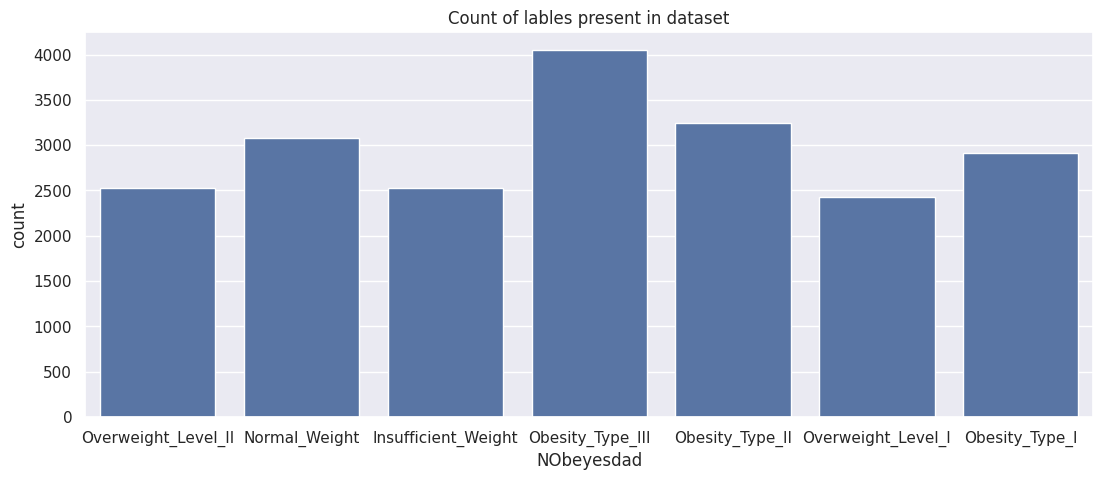

In [7]:
sns.set(style="darkgrid")
plt.figure(figsize=(13,5))
plt.title("Count of lables present in dataset")
sns.countplot(data=train_data, x='NObeyesdad');

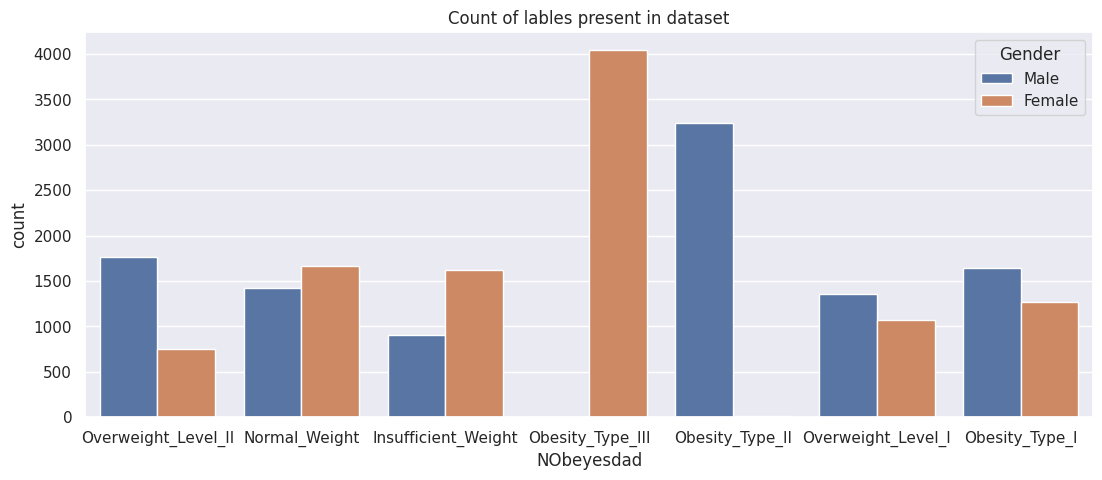

In [8]:
sns.set(style="darkgrid")
plt.figure(figsize=(13,5))
plt.title("Count of lables present in dataset")
sns.countplot(data=train_data, x='NObeyesdad', hue="Gender");

We can see that overall the data is balanced, having more presence of Obesity_Type_III.

Now let´s try to find some interesting relations between categorical variables, mainly focusing on the labels or targets we are trying to classify

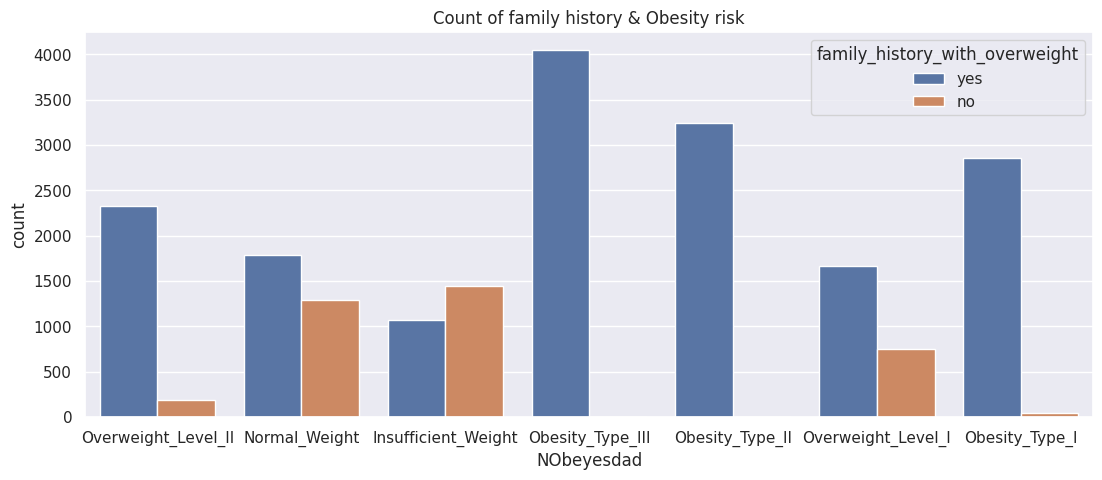

In [9]:
plt.figure(figsize=(13,5))
plt.title("Count of family history & Obesity risk")
sns.countplot(data=train_data, x='NObeyesdad', hue="family_history_with_overweight");

The above plot is quite interesting and informative. We are looking at count or frequency of data for each label comparing with the category of family history, we can observe that this feature somehow describe a pattern or relation between the category binary values (yes/no) and the type of obesity.
Then Obesity types from 1 to 3 all describe cases where there is a family history with overweight.

Now you are getting the idea let´s explore and examine more categorical variables in data.

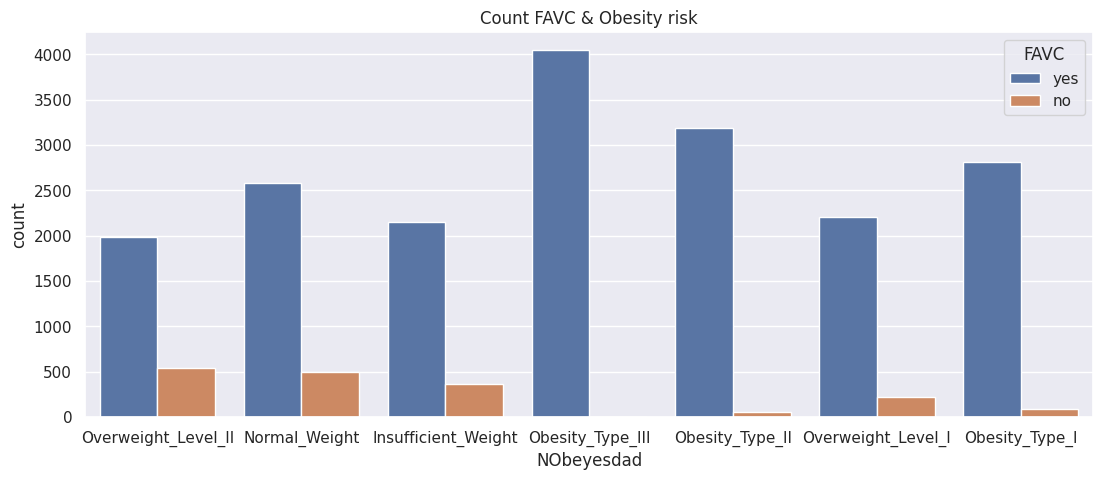

In [10]:
plt.figure(figsize=(13,5))
plt.title("Count FAVC & Obesity risk")
sns.countplot(data=train_data, x='NObeyesdad', hue="FAVC");

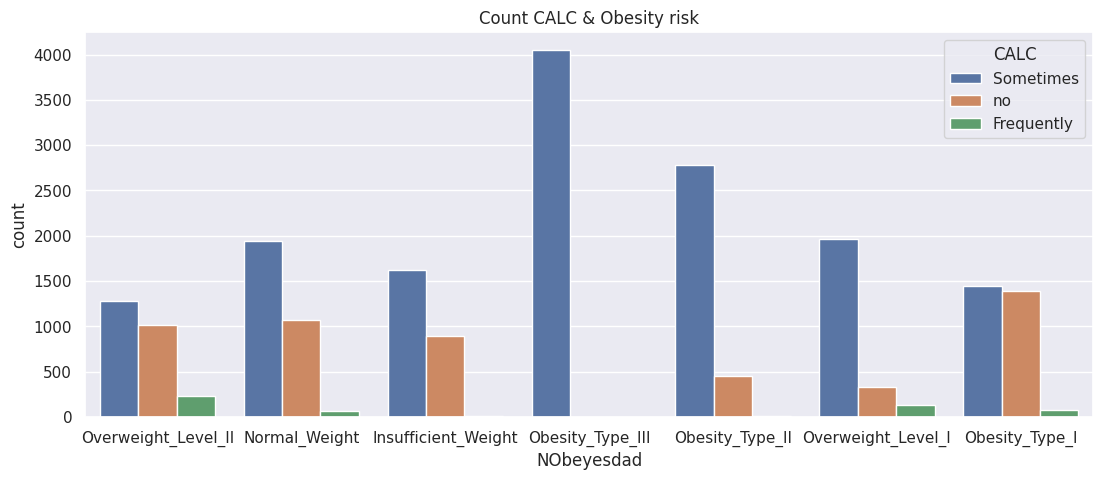

In [11]:
plt.figure(figsize=(13,5))
plt.title("Count CALC & Obesity risk")
sns.countplot(data=train_data, x='NObeyesdad', hue="CALC");

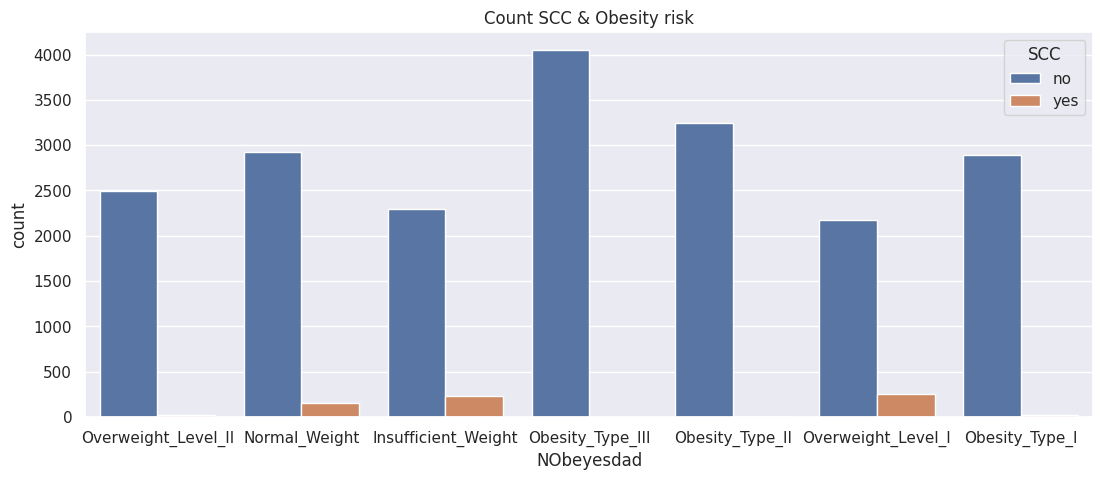

In [12]:
plt.figure(figsize=(13,5))
plt.title("Count SCC & Obesity risk")
sns.countplot(data=train_data, x='NObeyesdad', hue="SCC");

**Histograms**

Let´s pass to histograms, we use this type of graphs when we want to understand the distribution of data based on a numerical variable. In this case we are goung to explore weight distribution from different categorical variables.

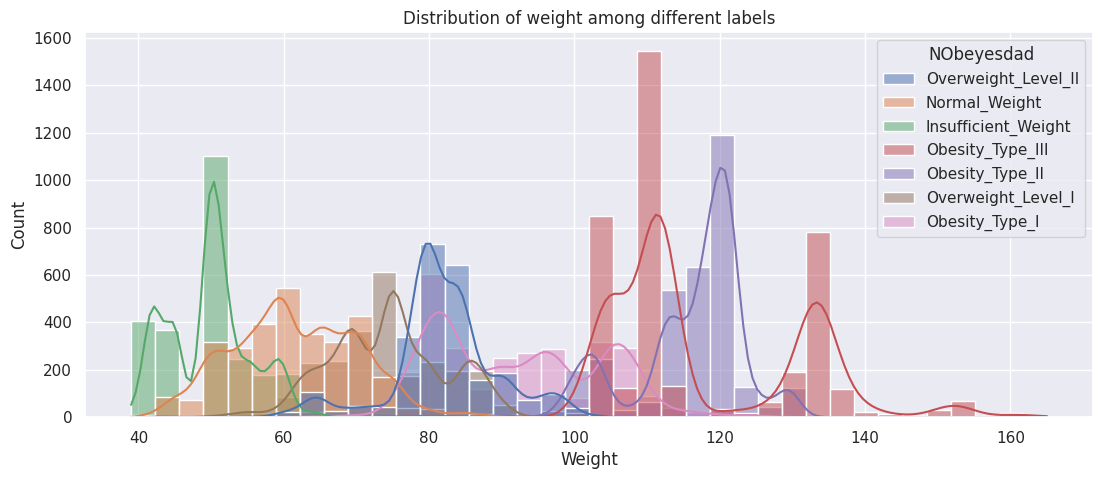

In [13]:
plt.figure(figsize=(13,5))
plt.title("Distribution of weight among different labels")
sns.histplot(data=train_data, x="Weight", hue="NObeyesdad", kde=True);

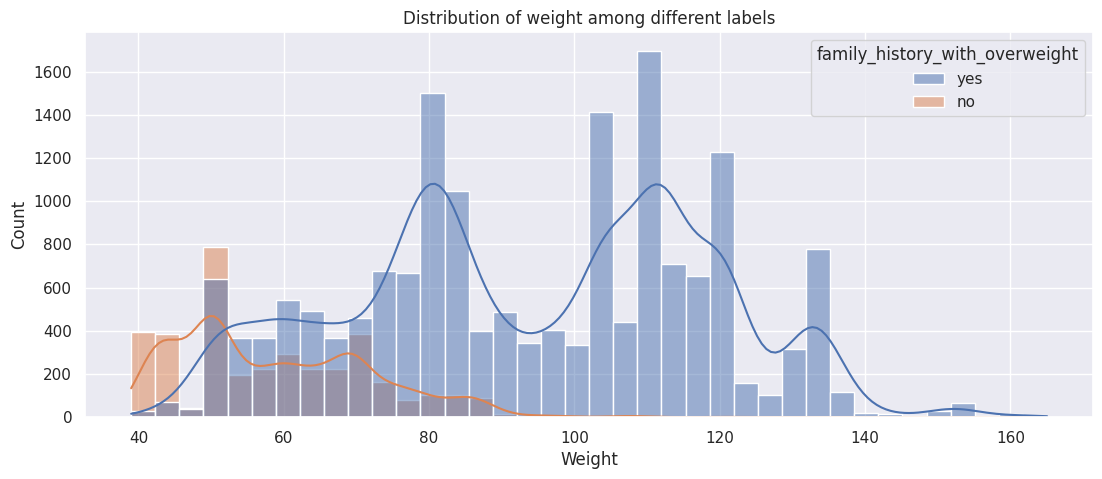

In [14]:
plt.figure(figsize=(13,5))
plt.title("Distribution of weight among different labels")
sns.histplot(data=train_data, x="Weight", hue="family_history_with_overweight", kde=True);

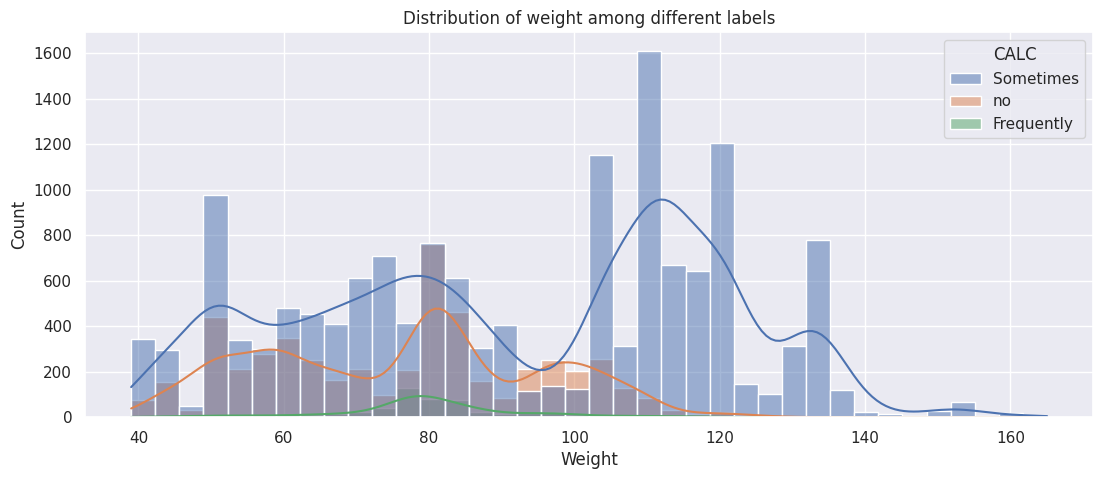

In [15]:
plt.figure(figsize=(13,5))
plt.title("Distribution of weight among different labels")
sns.histplot(data=train_data, x="Weight", hue="CALC", kde=True);

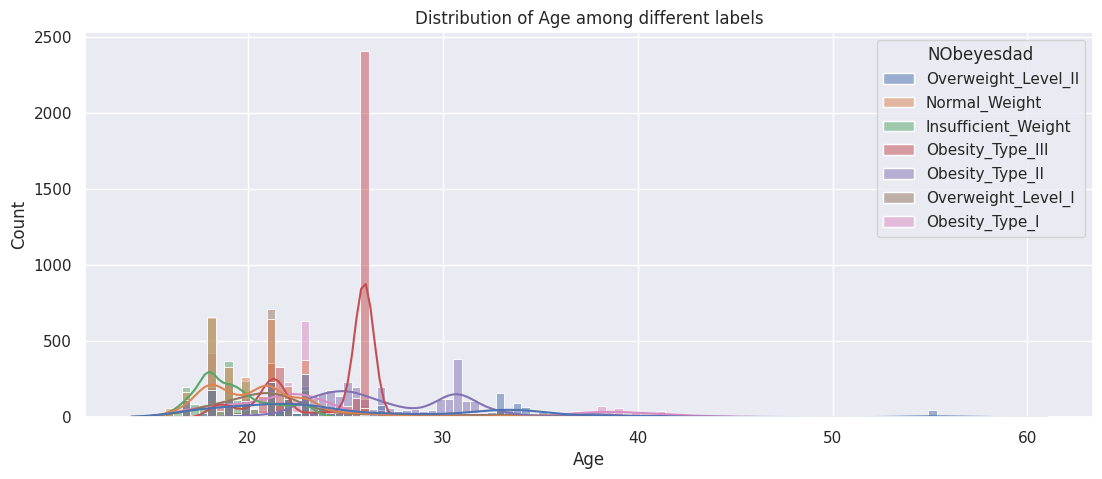

In [16]:
plt.figure(figsize=(13,5))
plt.title("Distribution of Age among different labels")
sns.histplot(data=train_data, x="Age", hue="NObeyesdad", kde=True);

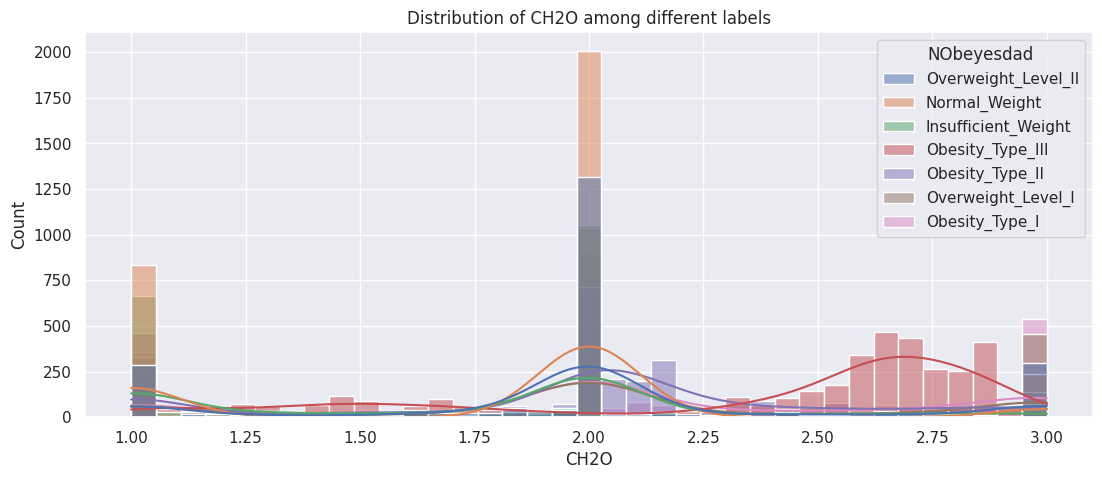

In [17]:
plt.figure(figsize=(13,5))
plt.title("Distribution of CH2O among different labels")
sns.histplot(data=train_data, x="CH2O", hue="NObeyesdad", kde=True);

**Scatter plots**

We use scatter plot when we want to compare two different numerical variables. In this case we use it to explore the relation between Height and Weight for each target label in the dataset.

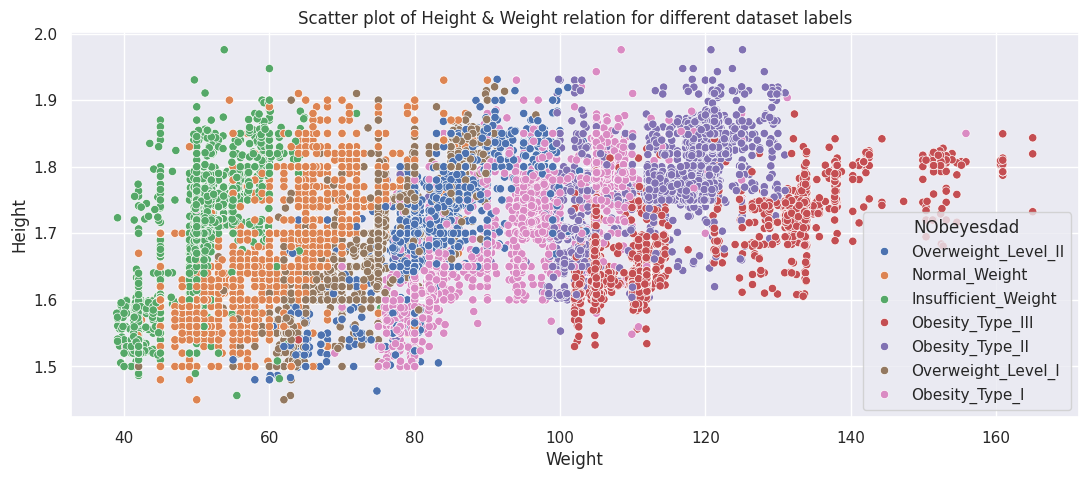

In [18]:
plt.figure(figsize=(13,5))
plt.title("Scatter plot of Height & Weight relation for different dataset labels")
sns.scatterplot(data=train_data, x='Weight', y='Height', hue="NObeyesdad");

At some point scatter plots also provides useful visualization of data in a 2D plane. We can use this information to try to see clusters or segments in data and try to think about the best approaches in order to divide/classify each cluster of labeled data.

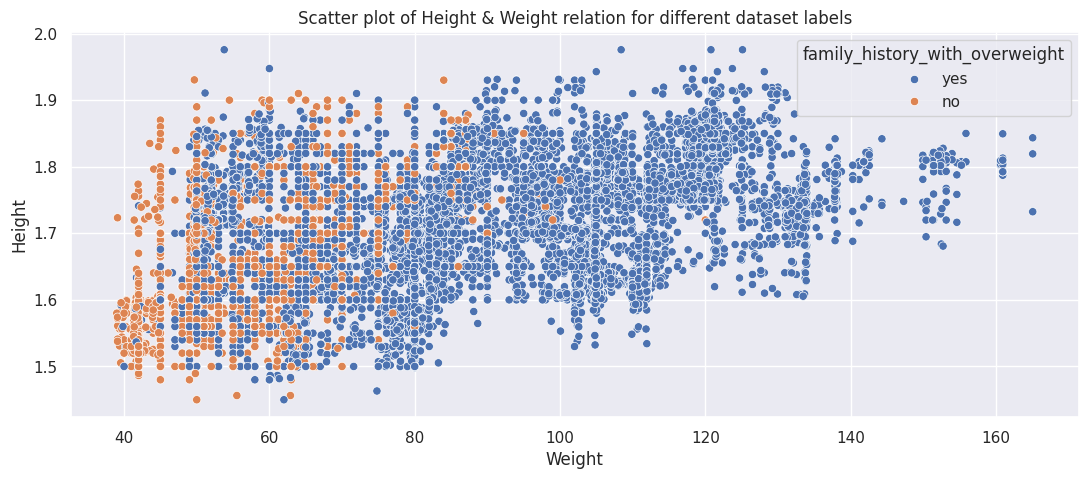

In [19]:
plt.figure(figsize=(13,5))
plt.title("Scatter plot of Height & Weight relation for different dataset labels")
sns.scatterplot(data=train_data, x='Weight', y='Height', hue="family_history_with_overweight");

**Advanced distribution visualization**

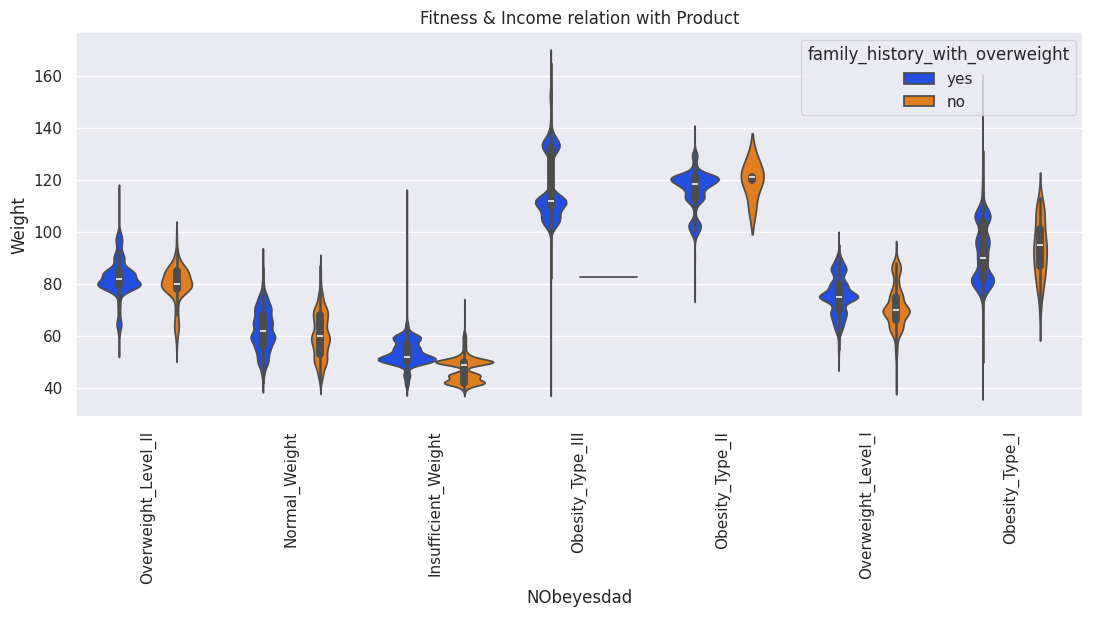

In [20]:
plt.figure(figsize=(13,5))
plt.title("Fitness & Income relation with Product")
sns.violinplot(data=train_data, y='Weight', x="NObeyesdad", hue="family_history_with_overweight", palette="bright")
plt.xticks(rotation=90);

<Figure size 1300x500 with 0 Axes>

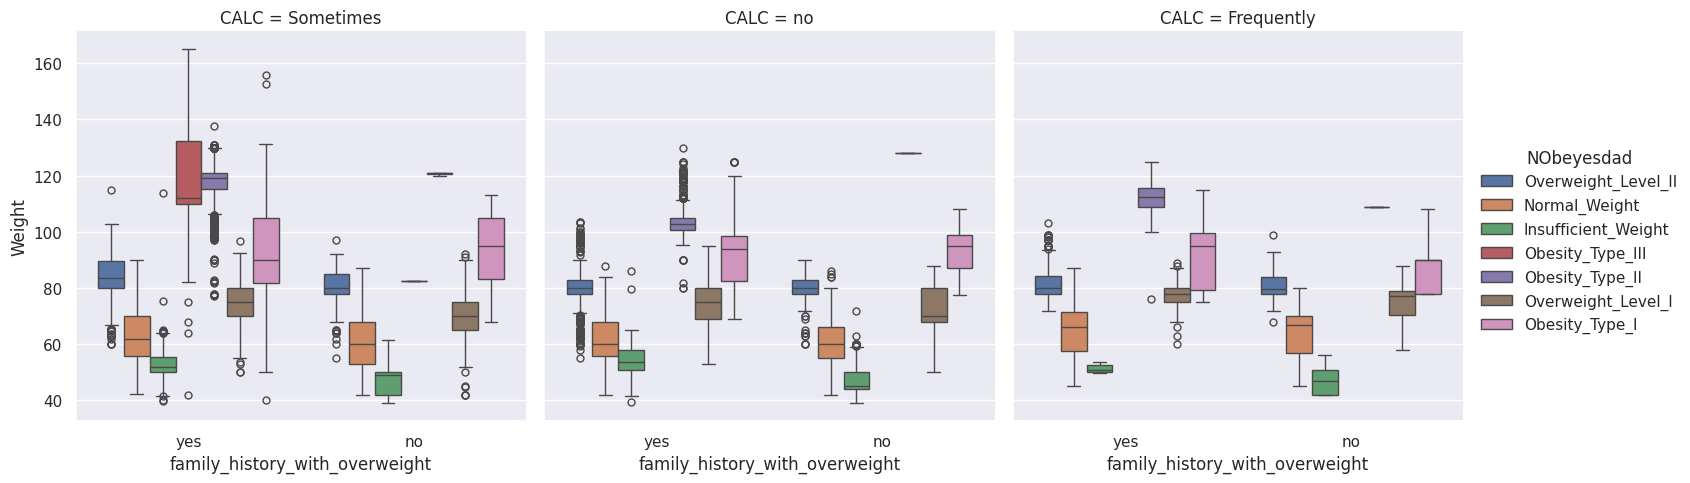

In [21]:
plt.figure(figsize=(13,5))
sns.catplot(data=train_data, x="family_history_with_overweight", y="Weight", hue="NObeyesdad", col="CALC", kind="box");

**Heatmaps**

Finally we can finish our data analysis process with some quantitative measures of relation between variables under the name of correlation. Correlation is used to express the relationship between variables and for us will work as a metric to select features for training the models.

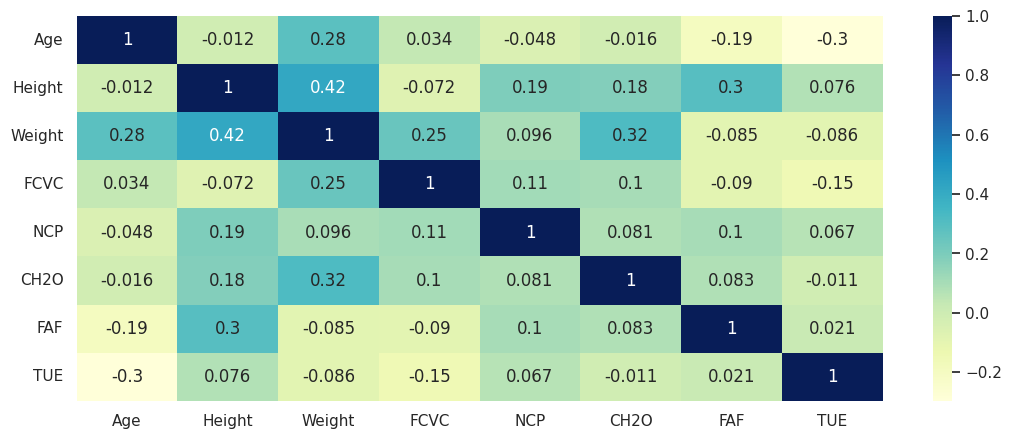

In [22]:
plt.figure(figsize=(13,5))
sns.heatmap(data=train_data[["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]].corr(), annot=True, cmap='YlGnBu');

## Feature Engineering & Data preparation 🛠

**Numerical features:** We will use the numerical variables that have high correlation among them.

* Weight
* Height
* CH2O
* FCVC
* Age

**Categorical features:** We will use the categorical variables according to the graphs we plotted previously.

* FAVC
* family_history_with_overweight
* CALC

**Import data preparation methods**

In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

**Load test data**

In [24]:
test_data = pd.read_csv(data_path + "test.csv")
test_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


**Change categorical variables to encoded version**

In [25]:
X = train_data[["Weight", "Height", "Age", "CH2O", "FCVC", "FAVC", "CALC", "family_history_with_overweight"]]
y = train_data["NObeyesdad"]

X_test = test_data[["Weight", "Height", "Age", "CH2O", "FCVC", "FAVC", "CALC", "family_history_with_overweight"]]

X = pd.get_dummies(X, columns=["FAVC", "CALC", "family_history_with_overweight"])
X_test = pd.get_dummies(X_test, columns=["FAVC", "CALC", "family_history_with_overweight"])
X_test = X_test.drop(["CALC_Always"], axis=1)

Because test.csv is not labeled we can´t use it to compare reaults and show model performance, because of this we are using the training data and splitting it to have 20 % as "validation" data from where we are going to show the results.

In [26]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data:", X_train.shape, y_train.shape)
print("Valid data:", X_valid.shape, y_valid.shape)
print("Test data:", X_test.shape)

Training data: (16606, 12) (16606,)
Valid data: (4152, 12) (4152,)
Test data: (13840, 12)


## Modeling 🤖

**Simple Decision Tree**

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

In [73]:
tree_model = DecisionTreeClassifier(random_state=0, ccp_alpha=0.01).fit(X_train, y_train)

In [74]:
tree_model.get_params()

{'ccp_alpha': 0.01,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [66]:
feature_names = X_train.columns
feature_names

Index(['Weight', 'Height', 'Age', 'CH2O', 'FCVC', 'FAVC_no', 'FAVC_yes',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no',
       'family_history_with_overweight_no',
       'family_history_with_overweight_yes'],
      dtype='object')

**Gain some model interpretability**

In [75]:
feature_importance = pd.DataFrame(tree_model.feature_importances_, index=feature_names)
feature_importance

,0
Weight,0.574836
Height,0.126397
Age,0.045713
CH2O,0.000000
FCVC,0.253055
FAVC_no,0.000000
FAVC_yes,0.000000
CALC_Frequently,0.000000
CALC_Sometimes,0.000000
CALC_no,0.000000


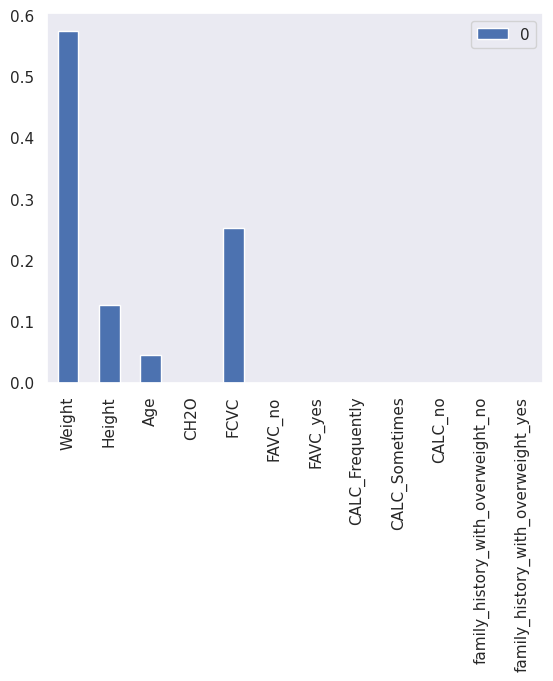

In [76]:
feature_importance.plot(kind="bar");

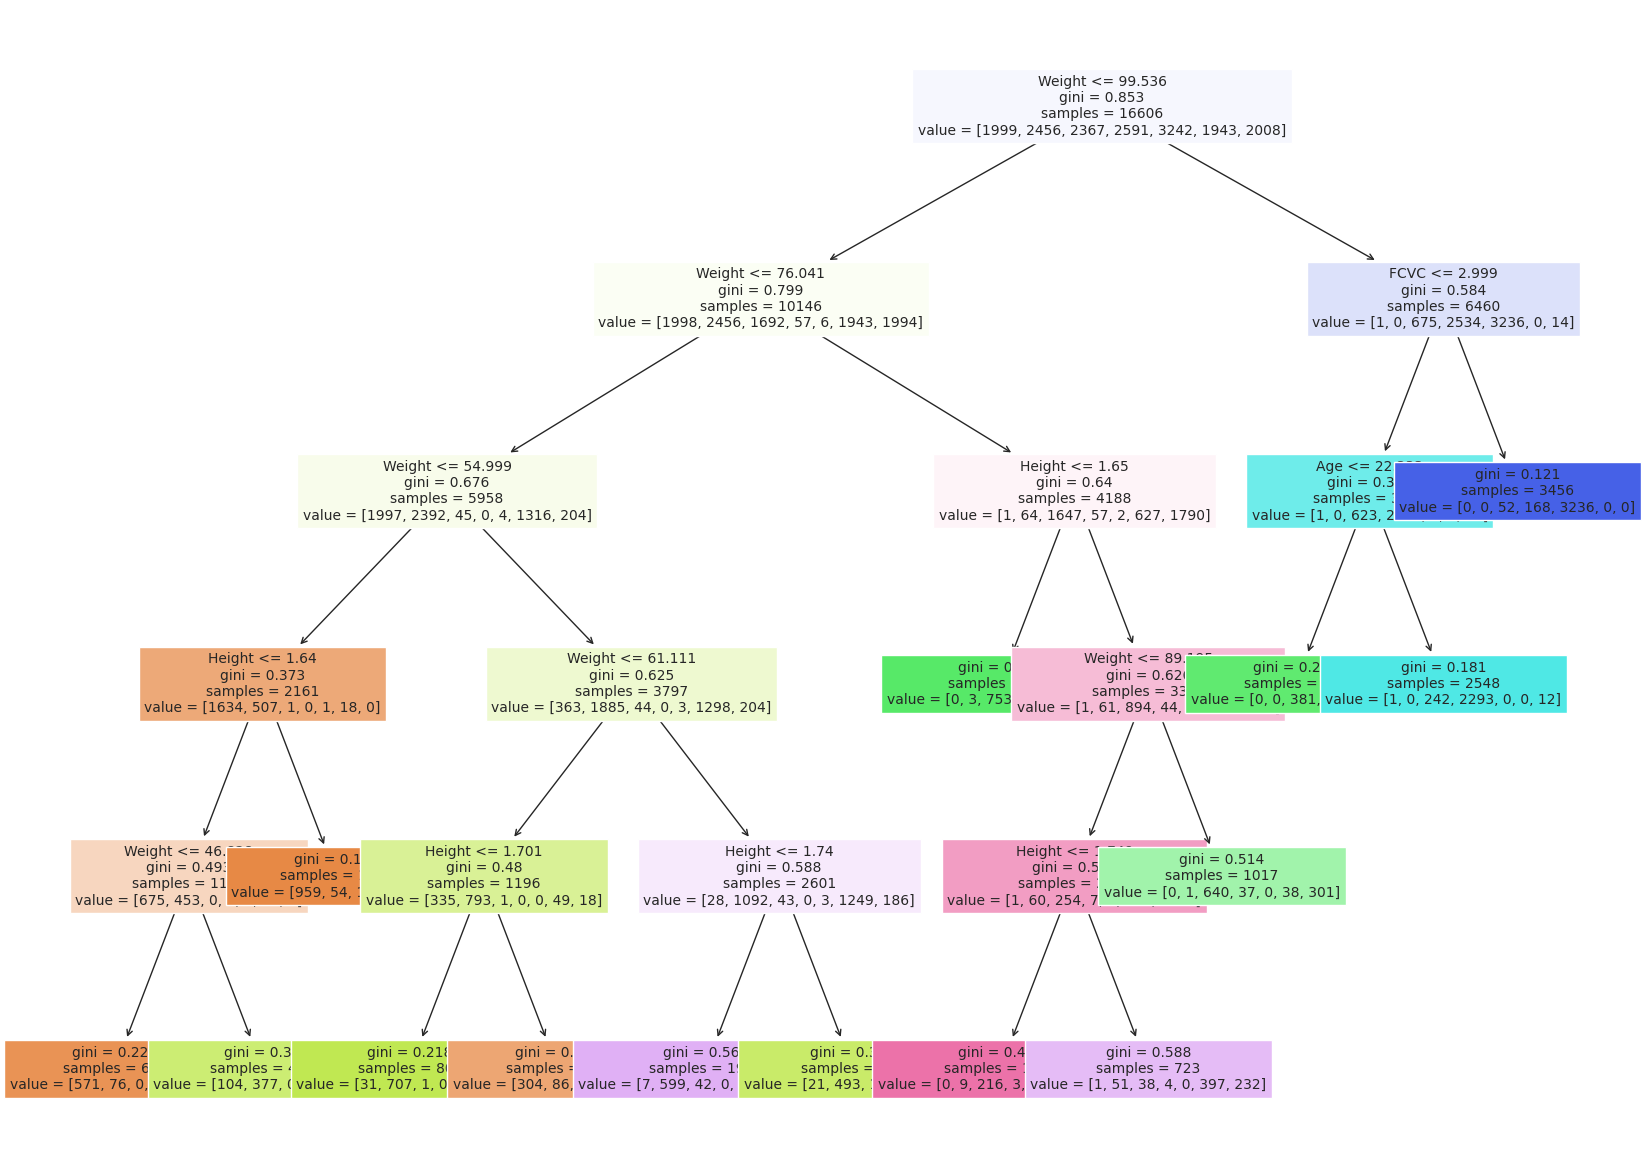

In [85]:
from sklearn import tree

fig = plt.figure(figsize=(20, 15))
_ = tree.plot_tree(tree_model,
                   feature_names=feature_names,
                   filled=True,
                   fontsize=10,
                   label="all")

## Performance evaluation & Inference 📊

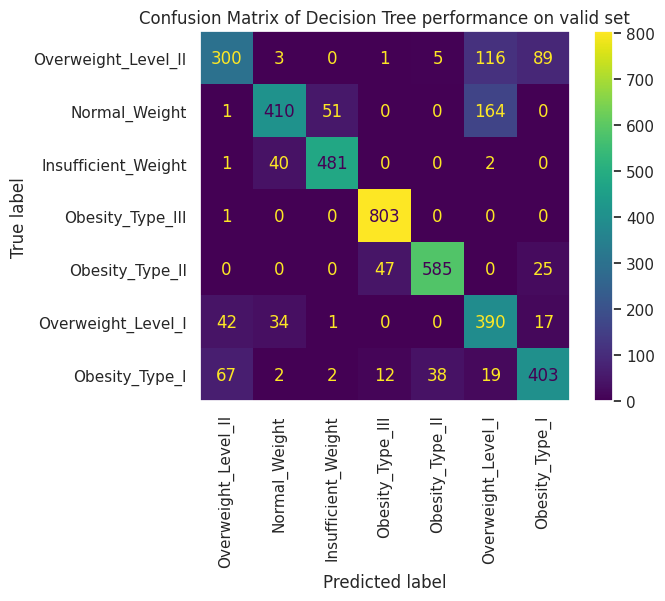

In [78]:
sns.set(style="dark") # drop the grid
predictions = tree_model.predict(X_valid)
cm = confusion_matrix(y_valid, predictions, labels=train_data["NObeyesdad"].unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=train_data["NObeyesdad"].unique())
disp.plot()
plt.title("Confusion Matrix of Decision Tree performance on valid set")
plt.xticks(rotation=90)
plt.show();

In [79]:
print(classification_report(y_valid, predictions, target_names=train_data["NObeyesdad"].unique()))

                     precision    recall  f1-score   support

Overweight_Level_II       0.90      0.92      0.91       524
      Normal_Weight       0.84      0.65      0.74       626
Insufficient_Weight       0.75      0.74      0.75       543
   Obesity_Type_III       0.93      0.89      0.91       657
    Obesity_Type_II       0.93      1.00      0.96       804
 Overweight_Level_I       0.56      0.81      0.66       484
     Obesity_Type_I       0.73      0.58      0.65       514

           accuracy                           0.81      4152
          macro avg       0.81      0.80      0.80      4152
       weighted avg       0.82      0.81      0.81      4152



## Saving model/s 🔐

In [92]:
from joblib import dump

try:
  dump(tree_model, "/content/drive/MyDrive/Data_Science_Foundations/playground-series-s4e2/tree_classifier_obesity_risk.pkl")
except:
  print("An error ocurred during saving the model")